In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import edhec_risk as erk
import matplotlib.pyplot as plt

ind = erk.get_ind_returns()
er = erk.annualize_rets(ind["1996":"2000"],12)
cov = ind["1996":"2000"].cov()

C:\Users\csm116\OneDrive - Imperial College London\COURSERA-FINANCE\Introduction to Portfolio Construction\Week 2\edhec_risk.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ind = pd.read_csv("../data/ind30_m_vw_rets.csv",header=0, index_col=0,parse_dates=True)/100


In [2]:
def optimal_weights(n_points, er, cov):
    """
    -> list of weights to run the optimizer on to minimize the vol
    """
    target_rs = np.linspace(er.min(),er.max(), n_points)
    weights = [minimize_vol(target_return,er,cov) for target_return in target_rs]
    return weights
    
def plot_ef(n_points, er, cov, style=".-"):
    """
    Plots the N-asset efficient frontier
    """
    weights = optimal_weights(n_points,er,cov)
    rets = [portfolio_return(w,er) for w in weights]
    vols = [portfolio_vol(w, cov) for w in weights]                   
    ef = pd.DataFrame({"Returns":rets,"Volatility":vols})
    return ef.plot.line(x="Volatility",y="Returns",style=style)    

In [3]:
from scipy.optimize import minimize

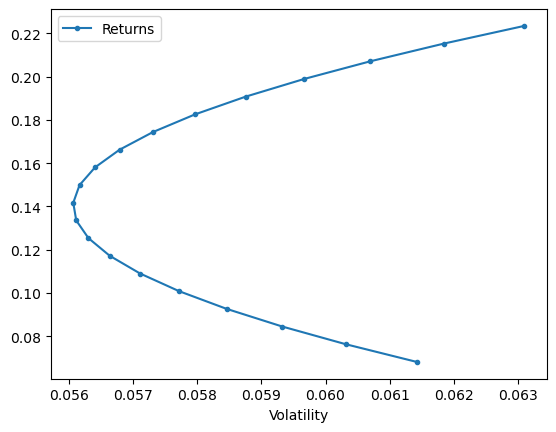

In [4]:
l=["Games","Fin"]
erk.plot_ef2(20,er[l],cov.loc[l,l])
plt.show()

In [5]:
import numpy as np

def minimize_vol(target_return, er, cov):
    """
    target_return -> W
    """
    n = er.shape[0]
    init_guess = np.repeat(1/n,n)
    bounds = ((0.0,1.0),)*n   # the cooma is to create a tuple of tuples n times
    return_is_target = {
        'type':'eq',
        'args':(er,),
        'fun': lambda weights, er: target_return - erk.portfolio_return(weights,er)
    }
    weights_sum_to_1 = {
        'type':'eq',
        'fun': lambda weights: np.sum(weights)-1 
    }
    results = minimize(erk.portfolio_vol,init_guess,
                      args = (cov,),method="SLSQP",
                       options={'disp':False},
                       constraints=(return_is_target, weights_sum_to_1),
                       bounds=bounds
                      )    
    return results.x

In [6]:
er[l]

Games    0.068212
Fin      0.223371
dtype: float64

In [7]:
w15 = erk.minimize_vol(0.15,er[l],cov.loc[l,l])
vol15 = erk.portfolio_vol(w15,cov.loc[l,l])
vol15

0.056163669406706564

In [8]:
w15

array([0.47287631, 0.52712369])

In [9]:
import pandas as pd
def optimal_weights(n_points, er, cov):
    """
    -> list of weights to run the optimizer on to minimize the vol
    """
    target_rs = np.linspace(er.min(),er.max(), n_points)
    weights = [minimize_vol(target_return,er,cov) for target_return in target_rs]
    return weights
    
def plot_ef(n_points, er, cov, style=".-"):
    """
    Plots the N-asset efficient frontier
    """
    weights = optimal_weights(n_points,er,cov)
    rets = [erk.portfolio_return(w,er) for w in weights]
    vols = [erk.portfolio_vol(w, cov) for w in weights]                   
    ef = pd.DataFrame({"Returns":rets,"Volatility":vols})
    return ef.plot.line(x="Volatility",y="Returns",style=style)

In [10]:
l=["Smoke","Fin","Games","Coal"]
plot_ef(25,er[l],cov.loc[l,l])

<Axes: xlabel='Volatility'>

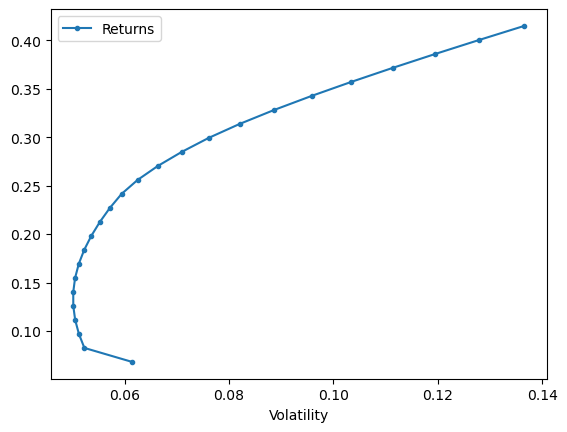

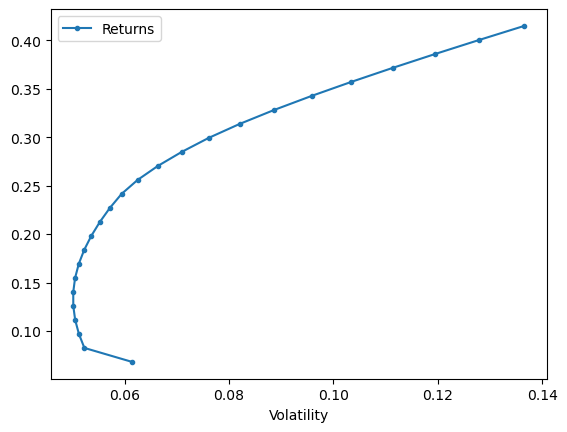

In [11]:
l=["Smoke","Fin","Games","Coal"]
erk.plot_ef(25,er[l],cov.loc[l,l])
plt.show()